<a href="https://colab.research.google.com/github/Jeba-Maliha/Cyber-Security-Projects/blob/main/ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('data_file.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [ ]:
df.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [ ]:
object_columns

['FileName', 'md5Hash']

In [ ]:
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [ ]:
benign_value_counts = df['Benign'].value_counts()

In [ ]:
benign_value_counts

Benign
0    35367
1    27118
Name: count, dtype: int64

In [ ]:
import hashlib


def hash_encode(value):
    return int(hashlib.md5(value.encode()).hexdigest(), 16) % (10**8)


df['FileName'] = df['FileName'].apply(hash_encode)
df['md5Hash'] = df['md5Hash'].apply(hash_encode)

print(df[['FileName', 'md5Hash']].head())


   FileName   md5Hash
0  40858921  96332080
1  76813859  31102975
2  83624734  70034872
3  35928298  61970491
4  52215038  90346227


In [ ]:
import numpy as np


z_score_threshold = 3


z_outliers = (np.abs(df[columns_to_scale]) > z_score_threshold)


print("Outliers in each column using Z-score method:\n", z_outliers.sum())


Outliers in each column using Z-score method:
 FileName                 0
md5Hash                  0
Machine                  0
DebugSize                1
DebugRVA               266
MajorImageVersion      154
MajorOSVersion          52
ExportRVA               25
ExportSize              13
IatVRA                 343
MajorLinkerVersion    1648
MinorLinkerVersion     298
NumberOfSections       797
SizeOfStackReserve     538
DllCharacteristics       0
ResourceSize             8
BitcoinAddresses      1125
dtype: int64


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(df[columns_to_scale])

df_inliers = df[outlier_labels != -1]


print("Number of rows after removing outliers:", df_inliers.shape[0])


Number of rows after removing outliers: 59360


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df.columns[df.columns != 'Benign']


scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


print(df.head())


   FileName   md5Hash   Machine  DebugSize  DebugRVA  MajorImageVersion  \
0 -0.324775  1.589318 -0.481400  -0.004004 -0.081004          -0.052767   
1  0.919201 -0.660573  2.071691  -0.003991 -0.017042          -0.043791   
2  1.154845  0.682271 -0.481400  -0.004004 -0.081004          -0.052767   
3 -0.495366  0.404113  2.071691  -0.003991 -0.070546          -0.043791   
4  0.068126  1.382853  2.071691  -0.003991 -0.029653          -0.043791   

   MajorOSVersion  ExportRVA  ExportSize    IatVRA  MajorLinkerVersion  \
0       -0.557274  -0.023689   -0.014358 -0.123099           -0.197036   
1        1.801516  -0.020340   -0.014185 -0.130383            0.466161   
2       -0.557274  -0.023689   -0.014358 -0.123099           -0.197036   
3        1.801516  -0.023125   -0.014349 -0.114235            0.466161   
4        1.801516  -0.020890   -0.014293 -0.067613            0.466161   

   MinorLinkerVersion  NumberOfSections  SizeOfStackReserve  \
0           -0.389552         -0.818853  

In [ ]:
benign_value_counts = df['Benign'].value_counts()
benign_value_counts

Benign
0    35367
1    27118
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_inliers, test_size=0.2, random_state=42)


In [ ]:
benign_value_counts = df_train['Benign'].value_counts()
benign_value_counts

Benign
0    27341
1    20147
Name: count, dtype: int64

C:\Users\SOHAN\AppData\Local\Temp\ipykernel_19984\4024777505.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=benign_value_counts.index, y=benign_value_counts.values, palette="viridis")


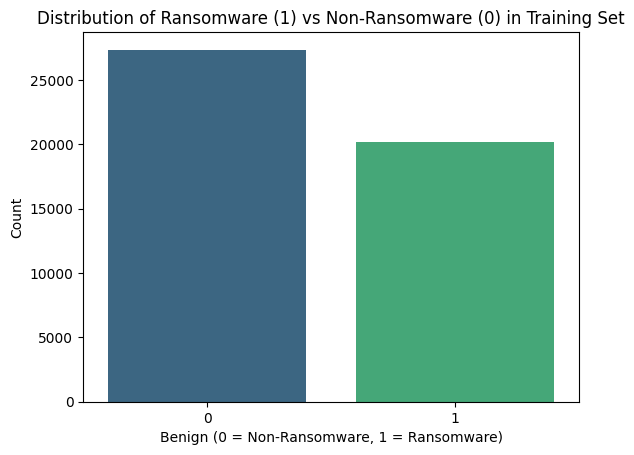

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


benign_value_counts = df_train['Benign'].value_counts()


sns.barplot(x=benign_value_counts.index, y=benign_value_counts.values, palette="viridis")


plt.xlabel('Benign (0 = Non-Ransomware, 1 = Ransomware)')
plt.ylabel('Count')
plt.title('Distribution of Ransomware (1) vs Non-Ransomware (0) in Training Set')


plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



X_train = df_train.drop(columns='Benign')
y_train = df_train['Benign']


models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Support Vector Classifier": SVC(probability=True),  # Enable probability estimates
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    print(f"Classification report for {model_name}:\n")
    print(classification_report(y_train, y_train_pred))


Classification report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     27341
           1       0.94      0.49      0.65     20147

    accuracy                           0.77     47488
   macro avg       0.83      0.73      0.74     47488
weighted avg       0.82      0.77      0.75     47488

Classification report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     27341
           1       0.90      0.79      0.84     20147

    accuracy                           0.87     47488
   macro avg       0.88      0.86      0.87     47488
weighted avg       0.88      0.87      0.87     47488

Classification report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27341
           1       1.00      0.99      0.99     20147

    accuracy                           1.00     4748

C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification report for AdaBoost:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27341
           1       0.98      0.98      0.98     20147

    accuracy                           0.99     47488
   macro avg       0.99      0.99      0.99     47488
weighted avg       0.99      0.99      0.99     47488

Classification report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27341
           1       0.99      0.99      0.99     20147

    accuracy                           0.99     47488
   macro avg       0.99      0.99      0.99     47488
weighted avg       0.99      0.99      0.99     47488

Classification report for Support Vector Classifier:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27341
           1       0.98      0.96      0.97     20147

    accuracy                           0.97  

Classification report for Naive Bayes on test set:

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      6852
           1       0.95      0.48      0.64      5020

    accuracy                           0.77     11872
   macro avg       0.83      0.73      0.73     11872
weighted avg       0.82      0.77      0.75     11872



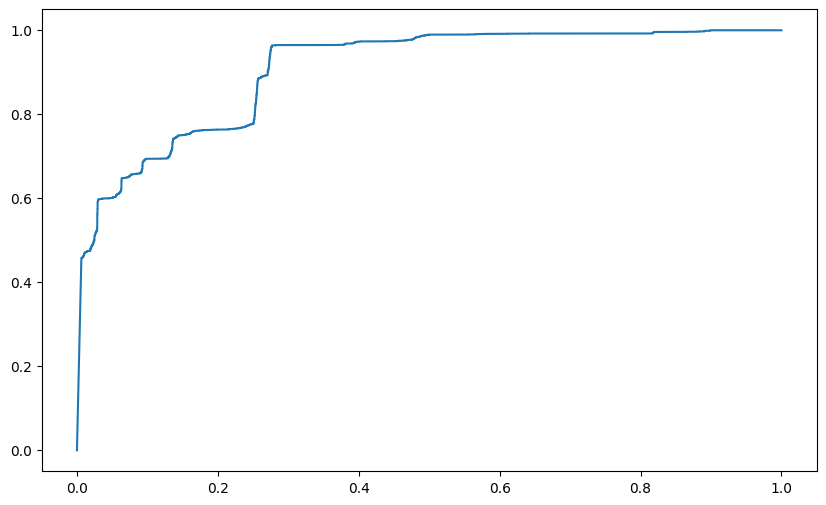

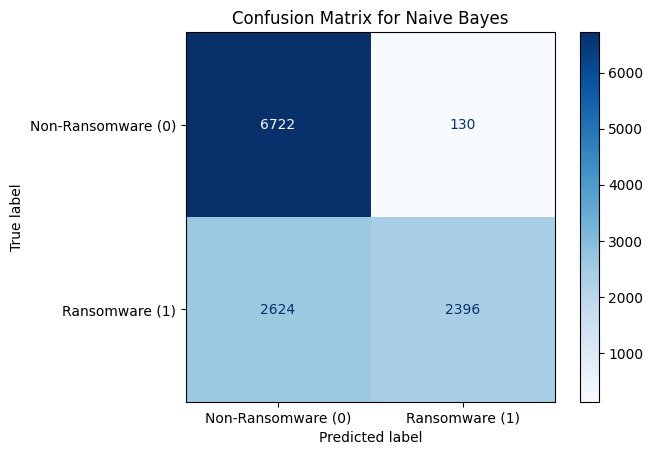

Classification report for Logistic Regression on test set:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6852
           1       0.90      0.78      0.83      5020

    accuracy                           0.87     11872
   macro avg       0.87      0.86      0.86     11872
weighted avg       0.87      0.87      0.87     11872



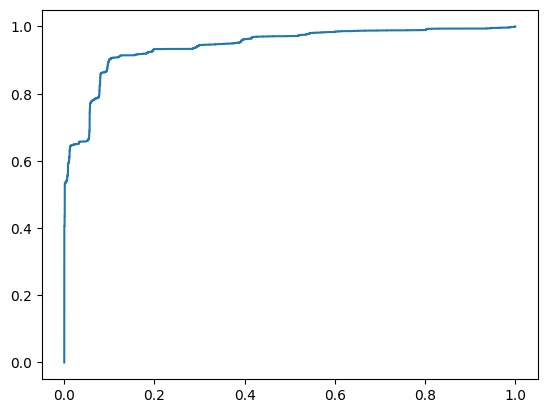

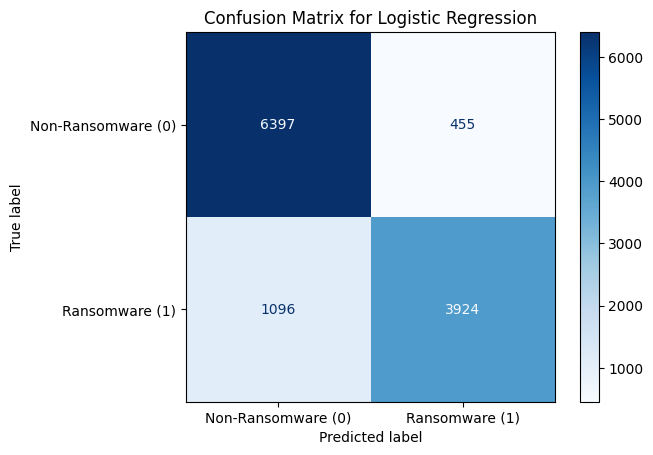

Classification report for Random Forest on test set:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6852
           1       1.00      0.99      0.99      5020

    accuracy                           1.00     11872
   macro avg       1.00      0.99      0.99     11872
weighted avg       1.00      1.00      1.00     11872



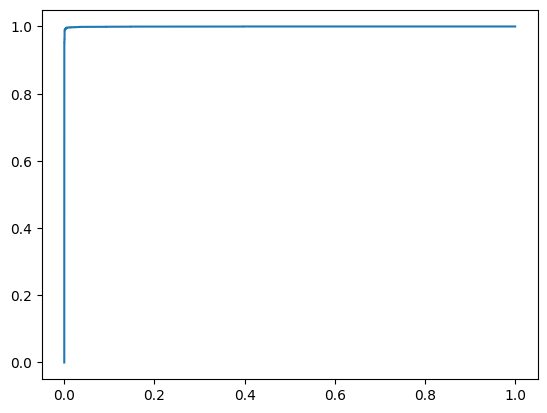

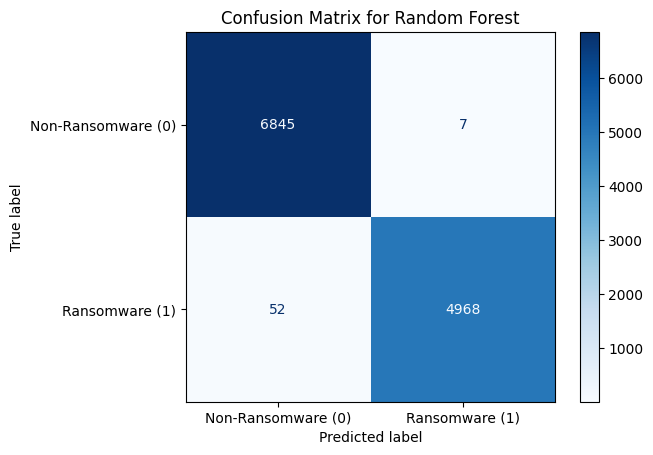

Classification report for AdaBoost on test set:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6852
           1       0.98      0.98      0.98      5020

    accuracy                           0.99     11872
   macro avg       0.98      0.98      0.98     11872
weighted avg       0.99      0.99      0.99     11872



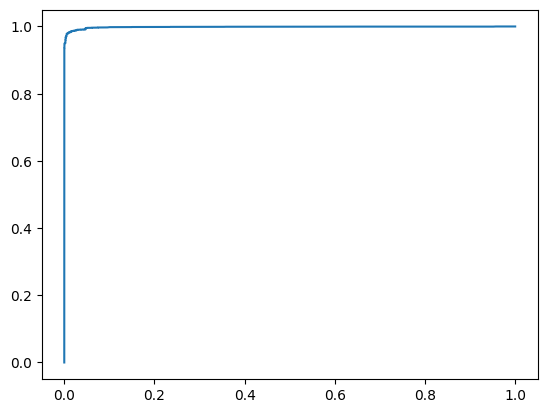

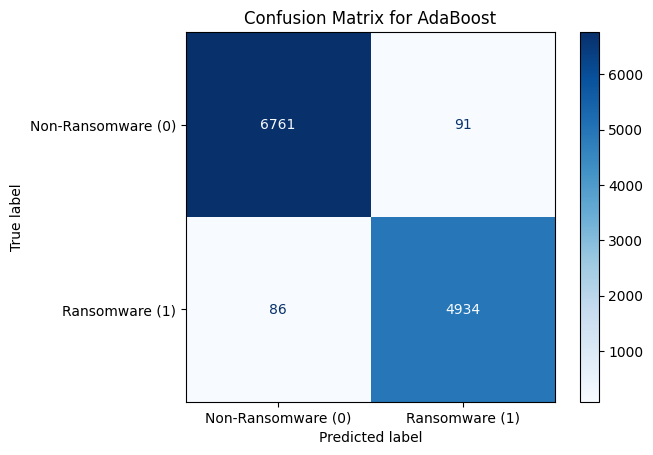

Classification report for Gradient Boosting on test set:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6852
           1       0.99      0.99      0.99      5020

    accuracy                           0.99     11872
   macro avg       0.99      0.99      0.99     11872
weighted avg       0.99      0.99      0.99     11872



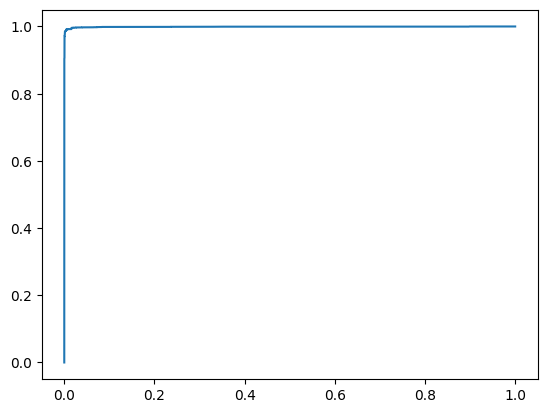

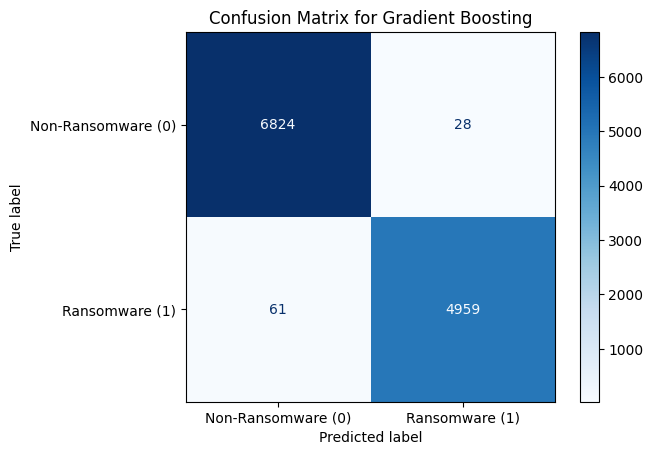

Classification report for Support Vector Classifier on test set:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6852
           1       0.98      0.96      0.97      5020

    accuracy                           0.97     11872
   macro avg       0.97      0.97      0.97     11872
weighted avg       0.97      0.97      0.97     11872



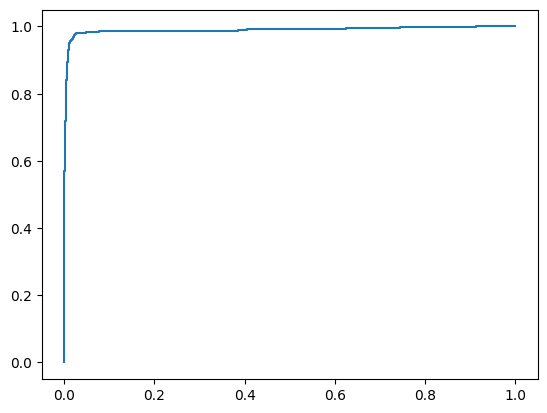

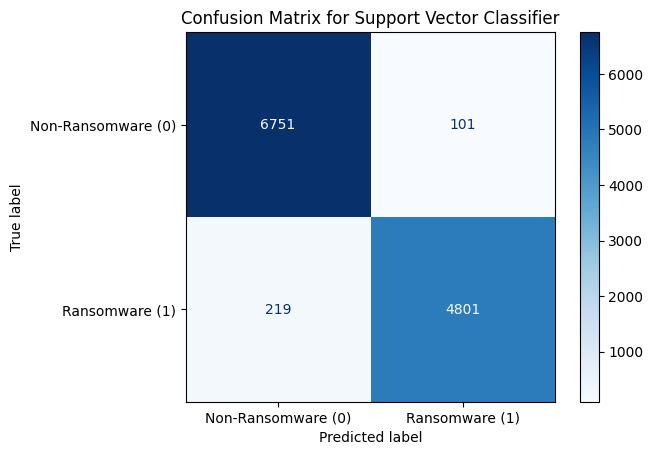

Classification report for MLP on test set:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6852
           1       0.99      0.98      0.99      5020

    accuracy                           0.99     11872
   macro avg       0.99      0.99      0.99     11872
weighted avg       0.99      0.99      0.99     11872



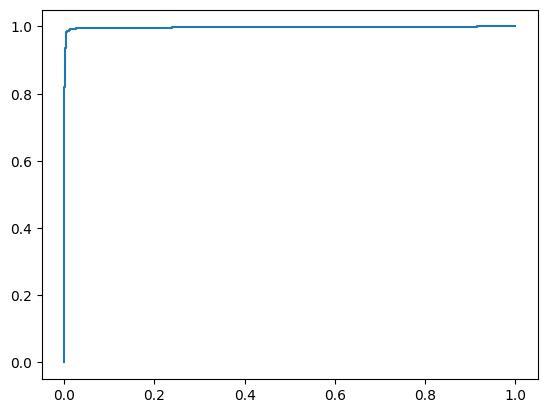

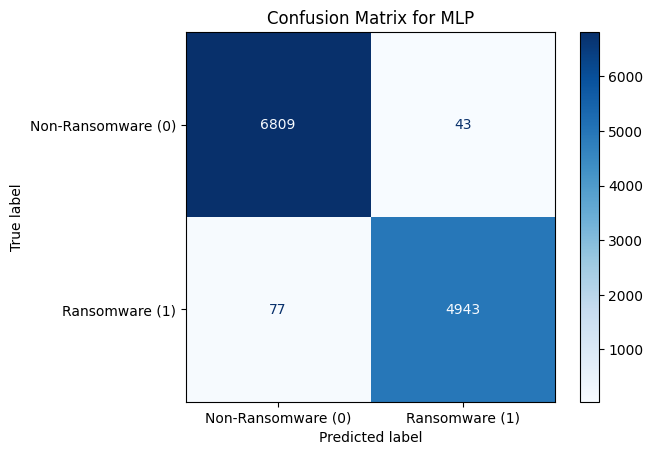

Classification report for K-Nearest Neighbors on test set:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6852
           1       0.98      0.97      0.97      5020

    accuracy                           0.98     11872
   macro avg       0.98      0.98      0.98     11872
weighted avg       0.98      0.98      0.98     11872



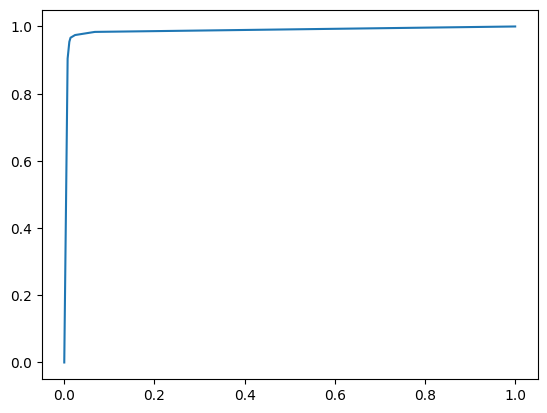

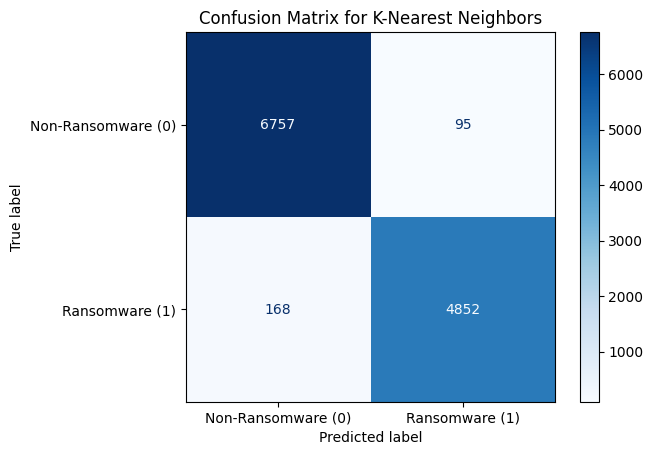

C:\Users\SOHAN\AppData\Local\Temp\ipykernel_19984\2395711638.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


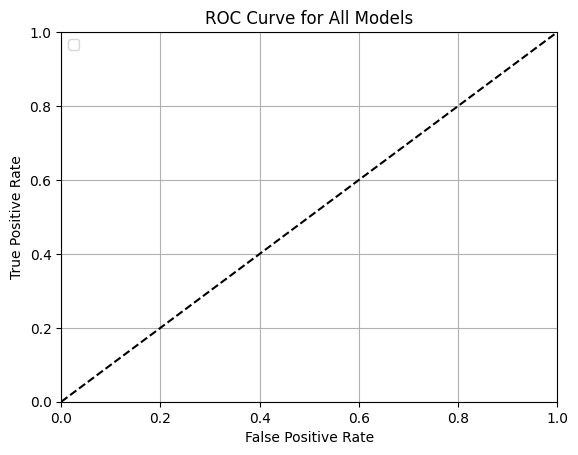

AUC results for all models:
 {'Naive Bayes': 0.9066851101141262, 'Logistic Regression': 0.9426435239776445, 'Random Forest': 0.9996650293164762, 'AdaBoost': 0.9984322052130068, 'Gradient Boosting': 0.9990945732539777, 'Support Vector Classifier': 0.989460808255594, 'MLP': 0.9978330112125926, 'K-Nearest Neighbors': 0.9868192146766118}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


X_test = df_test.drop(columns='Benign')
y_test = df_test['Benign']


results = {}
plt.figure(figsize=(10, 6))

for model_name, model in models.items():

    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]


    auc = roc_auc_score(y_test, y_test_pred_proba)
    results[model_name] = auc

    print(f"Classification report for {model_name} on test set:\n")
    print(classification_report(y_test, y_test_pred))


    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')


    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Ransomware (0)', 'Ransomware (1)']).plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

print("AUC results for all models:\n", results)


C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      6852
           1       0.95      0.48      0.64      5020

    accuracy                           0.77     11872
   macro avg       0.83      0.73      0.73     11872
weighted avg       0.82      0.77      0.75     11872

Naive Bayes Confusion Matrix: True Positive = 2396, False Positive = 130, False Negative = 2624, True Negative = 6722
Classification report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6852
           1       0.90      0.78      0.83      5020

    accuracy                           0.87     11872
   macro avg       0.87      0.86      0.86     11872
weighted avg       0.87      0.87      0.87     11872

Logistic Regression Confusion Matrix: True Positive = 3924, False Positive = 455, False Negative = 1096, True Negative = 6397
Classification

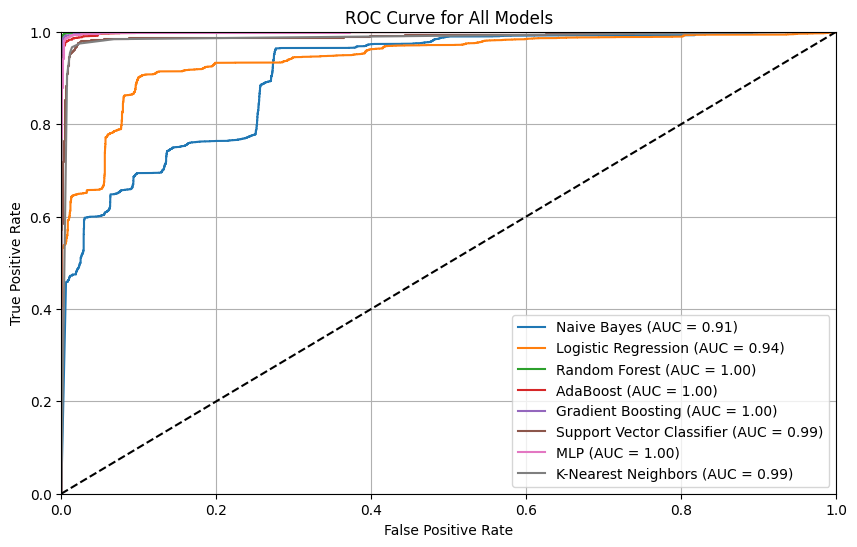

AUC results for all models:
 {'Naive Bayes': 0.9066851101141262, 'Logistic Regression': 0.9426435239776445, 'Random Forest': 0.9996650293164762, 'AdaBoost': 0.9984322052130068, 'Gradient Boosting': 0.9990945732539777, 'Support Vector Classifier': 0.989460808255594, 'MLP': 0.9978330112125926, 'K-Nearest Neighbors': 0.9868192146766118}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train = df_train.drop(columns='Benign')
y_train = df_train['Benign']

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)


X_test = df_test.drop(columns='Benign')
y_test = df_test['Benign']


results = {}

plt.figure(figsize=(10, 6))


for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]


    print(f"Classification report for {model_name}:\n")
    print(classification_report(y_test, y_test_pred))


    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    auc = roc_auc_score(y_test, y_test_pred_proba)
    results[model_name] = auc


    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"{model_name} Confusion Matrix: True Positive = {tp}, False Positive = {fp}, False Negative = {fn}, True Negative = {tn}")


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

print("AUC results for all models:\n", results)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


X_train = df_train.drop(columns='Benign')
y_train = df_train['Benign']

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Support Vector Classifier": SVC(probability=True),  # Enable probability estimates
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


results = {}


for model_name, model in models.items():

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    results[model_name] = {
        'fold_scores': scores,
        'mean': np.mean(scores),
        'std': np.std(scores)
    }


for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Fold Scores: {metrics['fold_scores']}")
    print(f"  Mean F1 Score: {metrics['mean']:.4f}")
    print(f"  Standard Deviation: {metrics['std']:.4f}\n")


C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Naive Bayes:
  Fold Scores: [0.64010494 0.6487013  0.64194708 0.64915144 0.64943089]
  Mean F1 Score: 0.6459
  Standard Deviation: 0.0040

Logistic Regression:
  Fold Scores: [0.83319989 0.83761589 0.84704319 0.8426369  0.84850874]
  Mean F1 Score: 0.8418
  Standard Deviation: 0.0057

Random Forest:
  Fold Scores: [0.99190435 0.99277529 0.99389864 0.99289543 0.99238737]
  Mean F1 Score: 0.9928
  Standard Deviation: 0.0007

AdaBoost:
  Fold Scores: [0.97954123 0.98080495 0.98421772 0.98277358 0.98259572]
  Mean F1 Score: 0.9820
  Standard Deviation: 0.0016

Gradient Boosting:
  Fold Scores: [0.98930348 0.98944231 0.99241388 0.99093055 0.98977556]
  Mean F1 Score: 0.9904
  Standard Deviation: 0.0012

Support Vector Classifier:
  Fold Scores: [0.96288841 0.96360442 0.9717288  0.96687086 0.97010801]
  Mean F1 Score: 0.9670
  Standard Deviation: 0.0035

MLP:
  Fold Scores: [0.98542419 0.98285714 0.98729763 0.98684211 0.98654038]
  Mean F1 Score: 0.9858
  Standard Deviation: 0.0016

K-Neares

**balanced**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

oversampling,hubrid sampling, undersampler
X_train = df_train.drop(columns='Benign')
y_train = df_train['Benign']


smote = SMOTE(random_state=42)


X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


df_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)
df_train_balanced['Benign'] = y_train_balanced


print("Original class distribution:\n", y_train.value_counts())
print("Balanced class distribution:\n", y_train_balanced.value_counts())


Original class distribution:
 Benign
0    27341
1    20147
Name: count, dtype: int64
Balanced class distribution:
 Benign
0    27341
1    27341
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:

X_train_balanced = df_train_balanced.drop(columns='Benign')
y_train_balanced = df_train_balanced['Benign']


models1 = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


for model_name, model in models1.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_balanced)
    print(f"Classification report for {model_name} on balanced training set:\n")
    print(classification_report(y_train_balanced, y_train_pred))


Classification report for Naive Bayes on balanced training set:

              precision    recall  f1-score   support

           0       0.66      0.98      0.79     27341
           1       0.96      0.49      0.65     27341

    accuracy                           0.73     54682
   macro avg       0.81      0.73      0.72     54682
weighted avg       0.81      0.73      0.72     54682

Classification report for Logistic Regression on balanced training set:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27341
           1       0.91      0.91      0.91     27341

    accuracy                           0.91     54682
   macro avg       0.91      0.91      0.91     54682
weighted avg       0.91      0.91      0.91     54682

Classification report for Random Forest on balanced training set:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27341
           1       1.00      0.9

C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification report for AdaBoost on balanced training set:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     27341
           1       0.98      0.99      0.98     27341

    accuracy                           0.98     54682
   macro avg       0.98      0.98      0.98     54682
weighted avg       0.98      0.98      0.98     54682

Classification report for Gradient Boosting on balanced training set:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27341
           1       0.99      0.99      0.99     27341

    accuracy                           0.99     54682
   macro avg       0.99      0.99      0.99     54682
weighted avg       0.99      0.99      0.99     54682

Classification report for Support Vector Classifier on balanced training set:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27341
           1       0.98  

C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


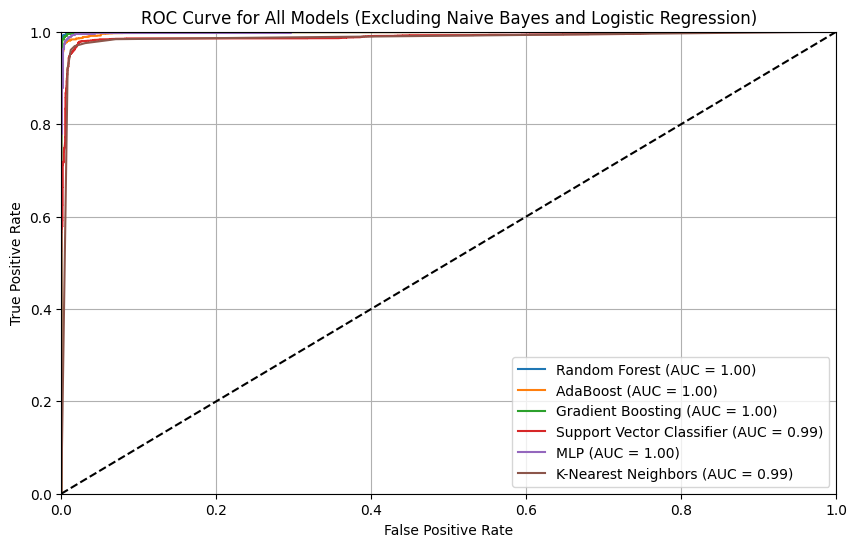

AUC results for all models (excluding Naive Bayes and Logistic Regression):
 {'Random Forest': 0.9994959304637842, 'AdaBoost': 0.9982700400964734, 'Gradient Boosting': 0.9990741209127297, 'Support Vector Classifier': 0.9894676402388112, 'MLP': 0.998169522726374, 'K-Nearest Neighbors': 0.9864851743056962}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

X_test = df_test.drop(columns='Benign')
y_test = df_test['Benign']

roc_results = {}

plt.figure(figsize=(10, 6))

for model_name, model in models1.items():
    if model_name in ['Naive Bayes', 'Logistic Regression']:
        continue

    model.fit(X_train_balanced, y_train_balanced)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_test_pred_proba)
    roc_results[model_name] = auc
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models (Excluding Naive Bayes and Logistic Regression)')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

print("AUC results for all models (excluding Naive Bayes and Logistic Regression):\n", roc_results)


Classification report for Naive Bayes on test set:

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      6852
           1       0.95      0.48      0.64      5020

    accuracy                           0.77     11872
   macro avg       0.83      0.73      0.73     11872
weighted avg       0.82      0.77      0.75     11872



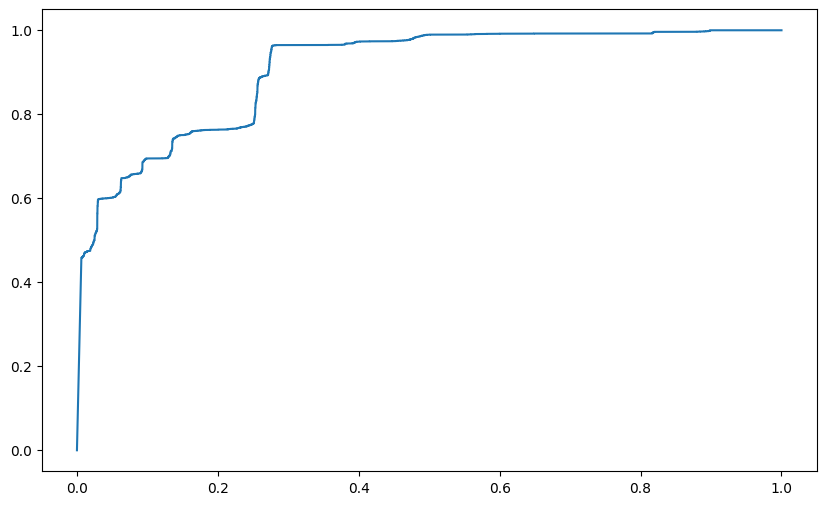

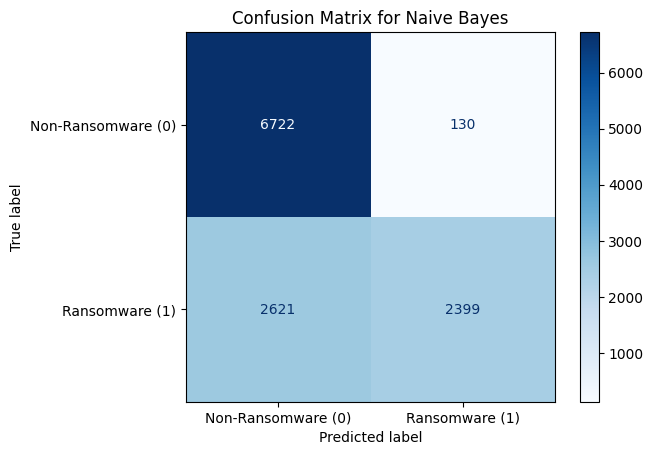

Classification report for Logistic Regression on test set:

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6852
           1       0.87      0.91      0.89      5020

    accuracy                           0.90     11872
   macro avg       0.90      0.90      0.90     11872
weighted avg       0.91      0.90      0.90     11872



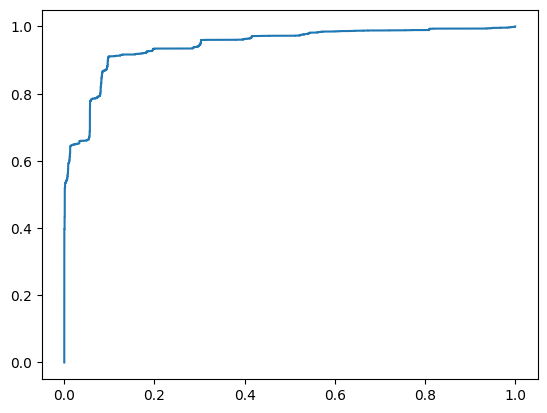

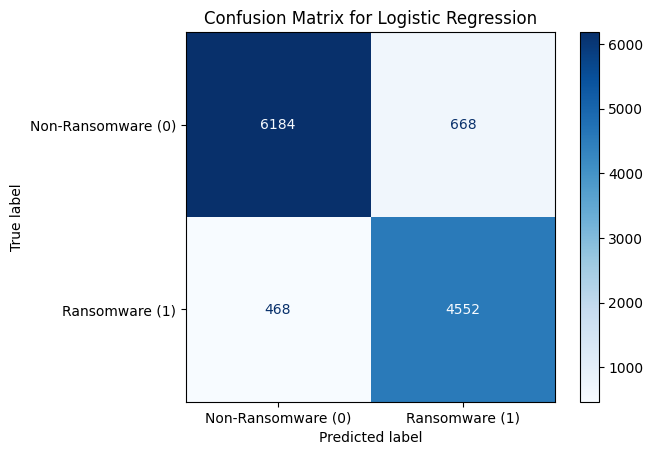

Classification report for Random Forest on test set:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6852
           1       1.00      0.99      0.99      5020

    accuracy                           0.99     11872
   macro avg       1.00      0.99      0.99     11872
weighted avg       0.99      0.99      0.99     11872



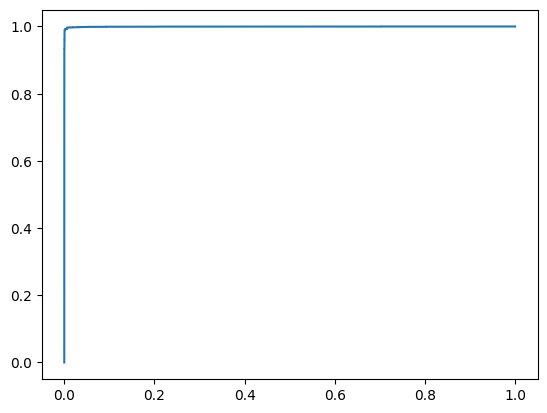

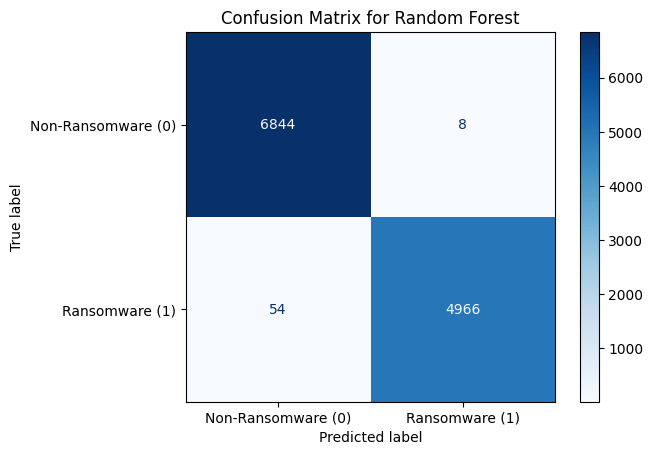

Classification report for AdaBoost on test set:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6852
           1       0.98      0.98      0.98      5020

    accuracy                           0.98     11872
   macro avg       0.98      0.98      0.98     11872
weighted avg       0.98      0.98      0.98     11872



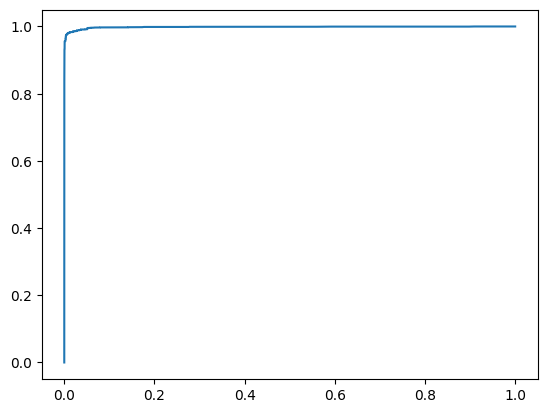

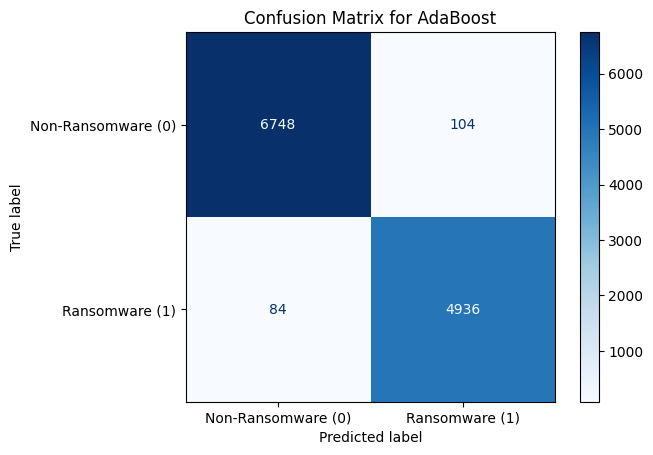

Classification report for Gradient Boosting on test set:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6852
           1       0.99      0.99      0.99      5020

    accuracy                           0.99     11872
   macro avg       0.99      0.99      0.99     11872
weighted avg       0.99      0.99      0.99     11872



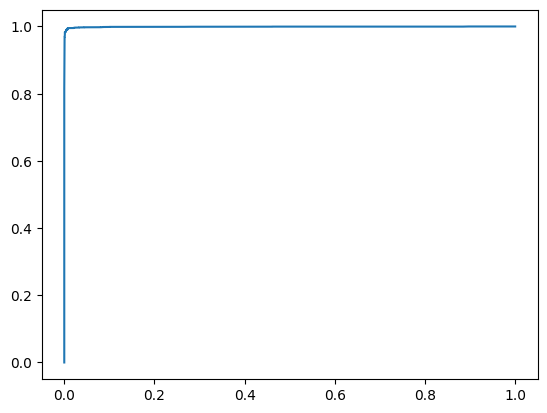

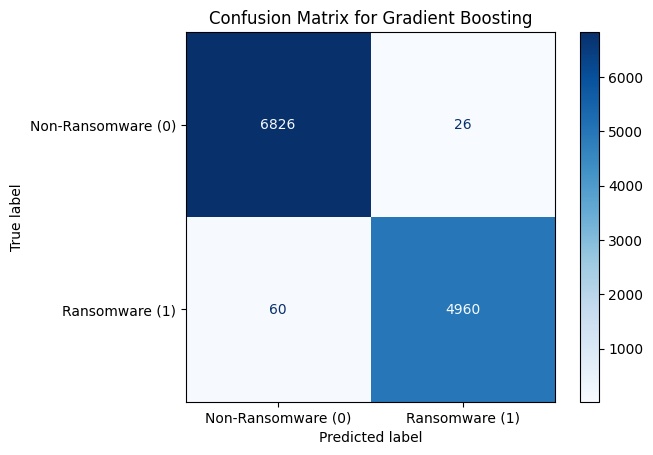

Classification report for Support Vector Classifier on test set:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6852
           1       0.98      0.96      0.97      5020

    accuracy                           0.97     11872
   macro avg       0.97      0.97      0.97     11872
weighted avg       0.97      0.97      0.97     11872



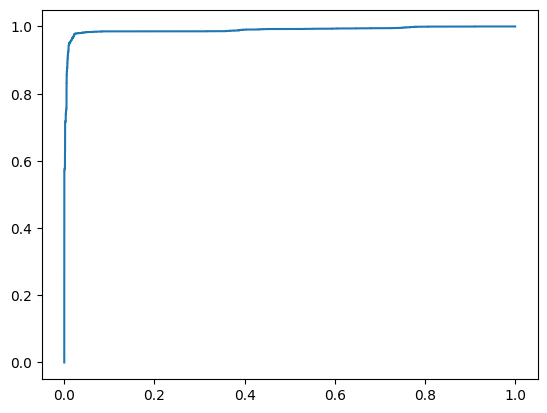

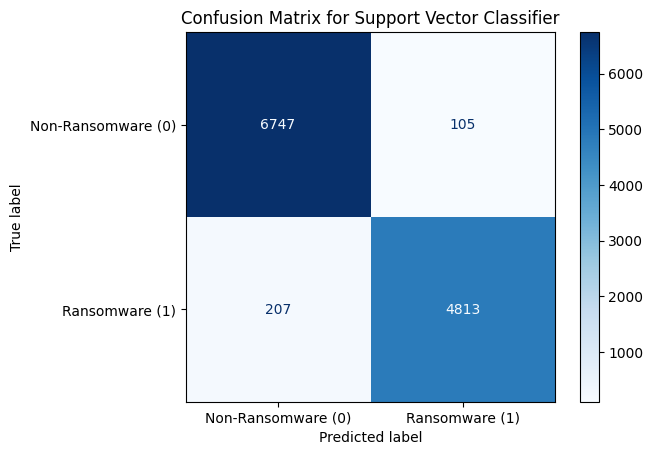

Classification report for MLP on test set:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6852
           1       0.99      0.99      0.99      5020

    accuracy                           0.99     11872
   macro avg       0.99      0.99      0.99     11872
weighted avg       0.99      0.99      0.99     11872



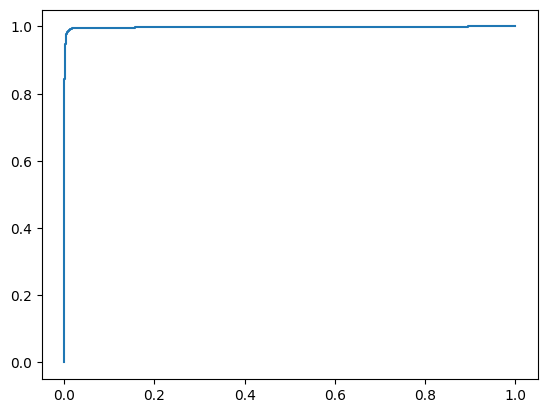

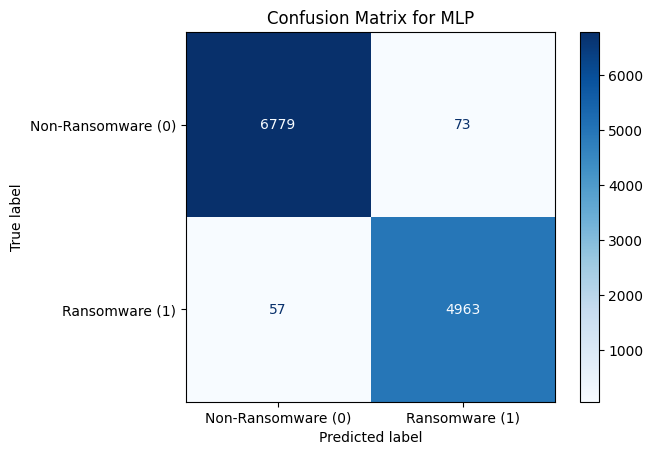

Classification report for K-Nearest Neighbors on test set:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6852
           1       0.98      0.97      0.97      5020

    accuracy                           0.98     11872
   macro avg       0.98      0.98      0.98     11872
weighted avg       0.98      0.98      0.98     11872



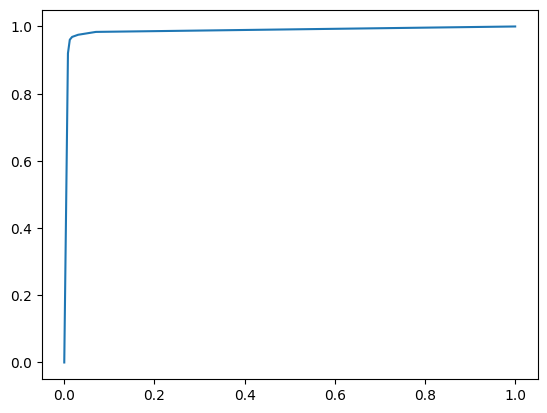

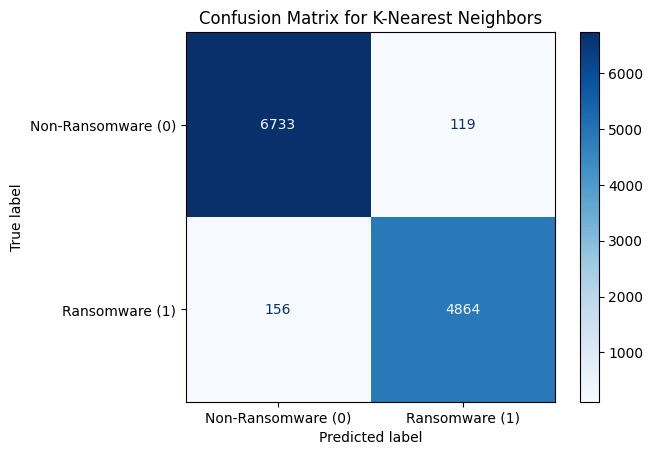

C:\Users\SOHAN\AppData\Local\Temp\ipykernel_19284\3147556690.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


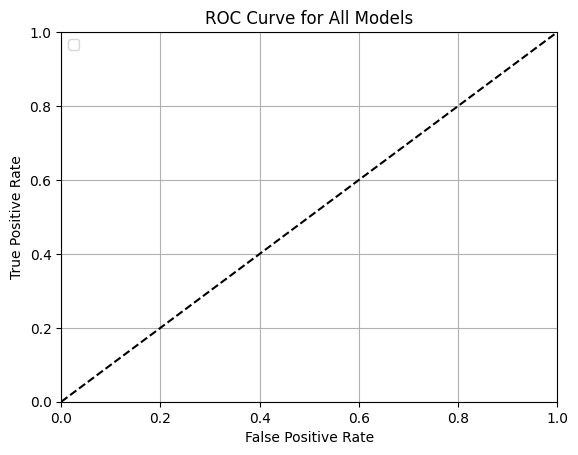

AUC results for all models:
 {'Naive Bayes': 0.9067062311175611, 'Logistic Regression': 0.9443443098592204, 'Random Forest': 0.9994959304637842, 'AdaBoost': 0.9982700400964734, 'Gradient Boosting': 0.9990741209127297, 'Support Vector Classifier': 0.9894676402388113, 'MLP': 0.998169522726374, 'K-Nearest Neighbors': 0.9864851743056962}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


X_test = df_test.drop(columns='Benign')
y_test = df_test['Benign']


test_results = {}
plt.figure(figsize=(10, 6))

for model_name, model in models1.items():

    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]


    auc = roc_auc_score(y_test, y_test_pred_proba)
    test_results[model_name] = auc

    print(f"Classification report for {model_name} on test set:\n")
    print(classification_report(y_test, y_test_pred))

    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')


    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Ransomware (0)', 'Ransomware (1)']).plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

print("AUC results for all models:\n", test_results)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


X_train_balanced = df_train_balanced.drop(columns='Benign')
y_train_balanced = df_train_balanced['Benign']


models1 = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


results = {}

for model_name, model in models1.items():

    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')  # Change 'f1' to other scoring methods if needed
    results[model_name] = {
        'fold_scores': scores,
        'mean': np.mean(scores),
        'std': np.std(scores)
    }


for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Fold Scores: {metrics['fold_scores']}")
    print(f"  Mean F1 Score: {metrics['mean']:.4f}")
    print(f"  Standard Deviation: {metrics['std']:.4f}\n")


C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


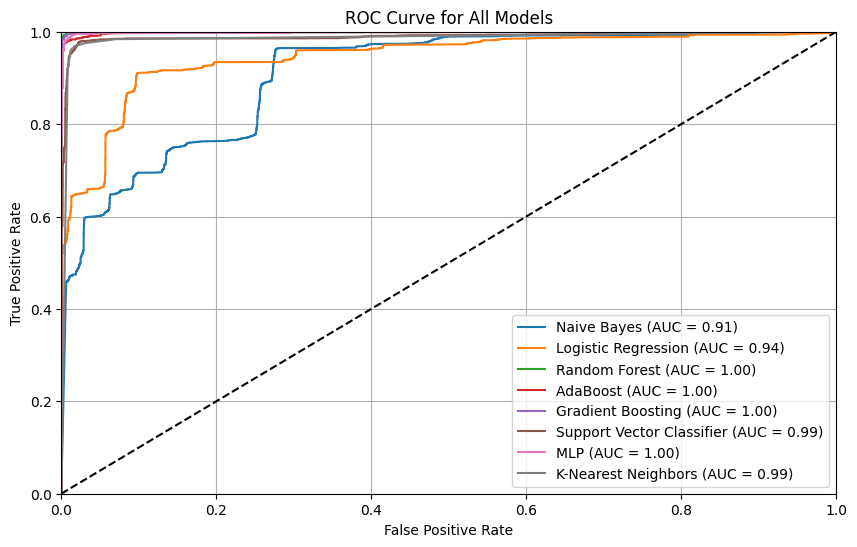

AUC results for all models:
 {'Naive Bayes': 0.9067062311175611, 'Logistic Regression': 0.9443443098592204, 'Random Forest': 0.9994959304637842, 'AdaBoost': 0.9982700400964734, 'Gradient Boosting': 0.9990741209127297, 'Support Vector Classifier': 0.9894676402388112, 'MLP': 0.998169522726374, 'K-Nearest Neighbors': 0.9864851743056962}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


X_test = df_test.drop(columns='Benign')
y_test = df_test['Benign']


roc_results = {}

plt.figure(figsize=(10, 6))


for model_name, model in models1.items():

    model.fit(X_train_balanced, y_train_balanced)


    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_test_pred_proba)
    roc_results[model_name] = auc


    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='best')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


print("AUC results for all models:\n", roc_results)


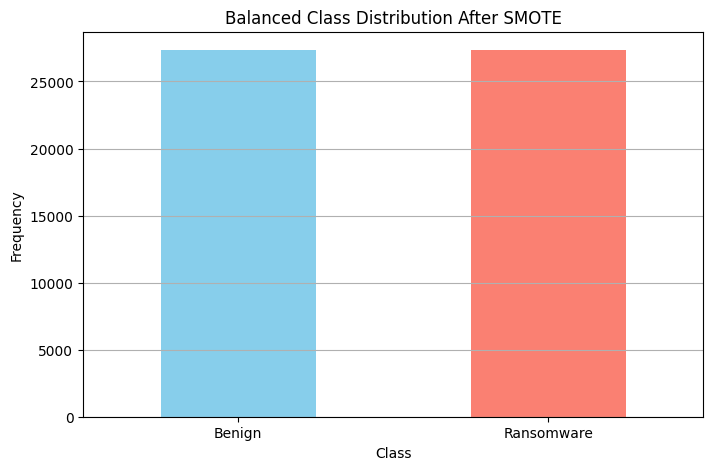

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
y_train_balanced.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Balanced Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Ransomware'], rotation=0)
plt.grid(axis='y')
plt.show()